In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'toscana'

path_data = f'{path_root}/data'
path_img_root = f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,9,Toscana,2,0,2,0,2,2,2,...,0.0,156.0,0.0,0.0,0.00,100.00,1.28,0.00,0.00,0.00
1,2020-02-26T18:00:00,9,Toscana,2,0,2,0,2,0,0,...,0.0,67.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,9,Toscana,2,0,2,0,2,0,0,...,0.0,47.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,9,Toscana,5,0,5,2,7,5,6,...,0.0,27.0,0.0,2.0,0.00,71.43,22.22,0.00,0.00,250.00
4,2020-02-29T17:00:00,9,Toscana,7,0,7,3,10,3,3,...,0.0,94.0,0.0,1.0,0.00,70.00,3.19,0.00,0.00,42.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2021-03-21T17:00:00,9,Toscana,1408,245,1653,24695,26348,297,1358,...,36.0,20929.0,9929.0,308.0,14.82,6.27,6.49,13.68,2.08,1.14
391,2021-03-22T17:00:00,9,Toscana,1461,245,1706,25073,26779,431,1140,...,23.0,13459.0,6582.0,378.0,14.36,6.37,8.47,17.32,0.00,1.64
392,2021-03-23T17:00:00,9,Toscana,1486,243,1729,24909,26638,-141,1062,...,31.0,22677.0,8839.0,-164.0,14.05,6.49,4.68,12.01,-0.82,-0.53
393,2021-03-24T17:00:00,9,Toscana,1488,253,1741,24770,26511,-127,1197,...,27.0,26059.0,10451.0,-139.0,14.53,6.57,4.59,11.45,4.12,-0.48


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 25, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1518
Nuovi tamponi: 24739.0
Percentuale nuovi positivi/nuovi tamponi: 6.1 %
Nuovi guariti: 1245.0
Nuovi deceduti: 22.0
Variazione positivi ricoverati con sintomi: -18.0
Variazione positivi in terapia intensiva: 4.0
Variazione positivi in isolamento dimiciliare: 265.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 25, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-24T17:00:00,9,Toscana,636,106,742,7675,8417,156,526,...,6.0,12539.0,5799.0,150.0,14.29,8.82,4.19,9.07,-0.93,1.89
1,2021-01-25T17:00:00,9,Toscana,661,109,770,7690,8460,43,422,...,14.0,6922.0,3144.0,15.0,14.16,9.10,6.10,13.42,2.83,0.51
2,2021-01-26T17:00:00,9,Toscana,682,103,785,7641,8426,-34,346,...,9.0,13784.0,5379.0,-49.0,13.12,9.32,2.51,6.43,-5.50,-0.40
3,2021-01-27T17:00:00,9,Toscana,676,103,779,7626,8405,-21,502,...,12.0,16980.0,6902.0,-15.0,13.22,9.27,2.96,7.27,0.00,-0.25
4,2021-01-28T17:00:00,9,Toscana,672,100,772,7902,8674,269,620,...,16.0,16117.0,7053.0,276.0,12.95,8.90,3.85,8.79,-2.91,3.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-03-21T17:00:00,9,Toscana,1408,245,1653,24695,26348,297,1358,...,36.0,20929.0,9929.0,308.0,14.82,6.27,6.49,13.68,2.08,1.14
57,2021-03-22T17:00:00,9,Toscana,1461,245,1706,25073,26779,431,1140,...,23.0,13459.0,6582.0,378.0,14.36,6.37,8.47,17.32,0.00,1.64
58,2021-03-23T17:00:00,9,Toscana,1486,243,1729,24909,26638,-141,1062,...,31.0,22677.0,8839.0,-164.0,14.05,6.49,4.68,12.01,-0.82,-0.53
59,2021-03-24T17:00:00,9,Toscana,1488,253,1741,24770,26511,-127,1197,...,27.0,26059.0,10451.0,-139.0,14.53,6.57,4.59,11.45,4.12,-0.48


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

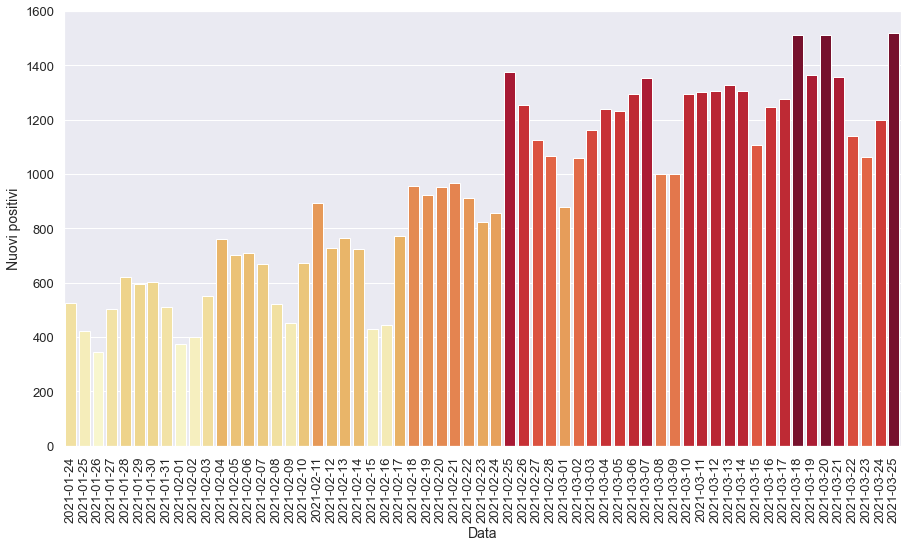

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

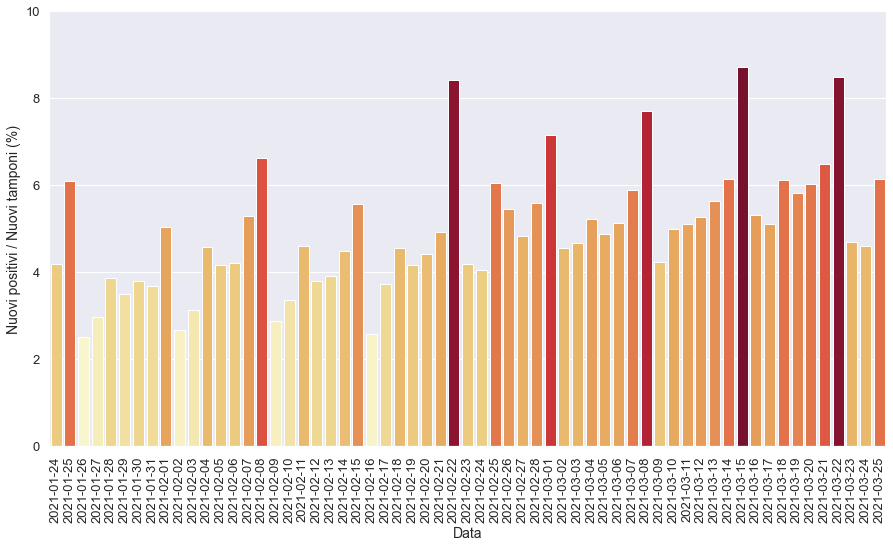

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

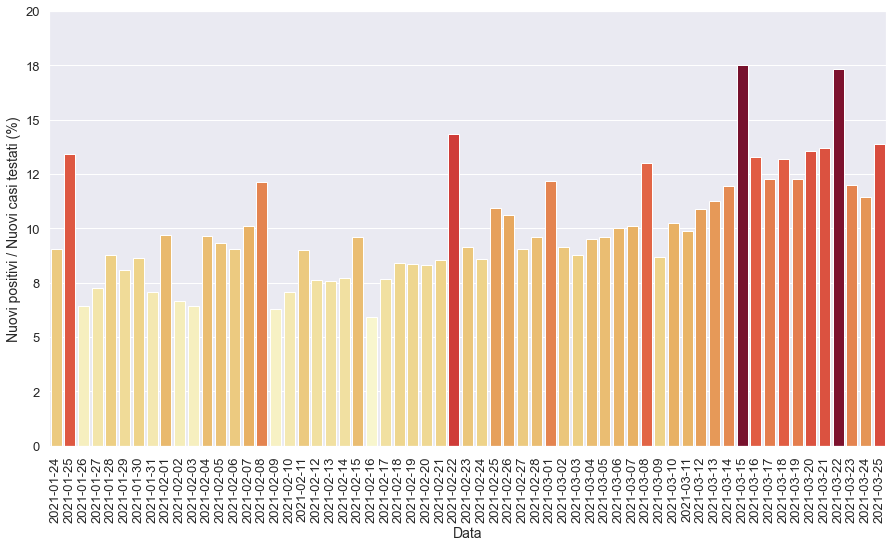

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

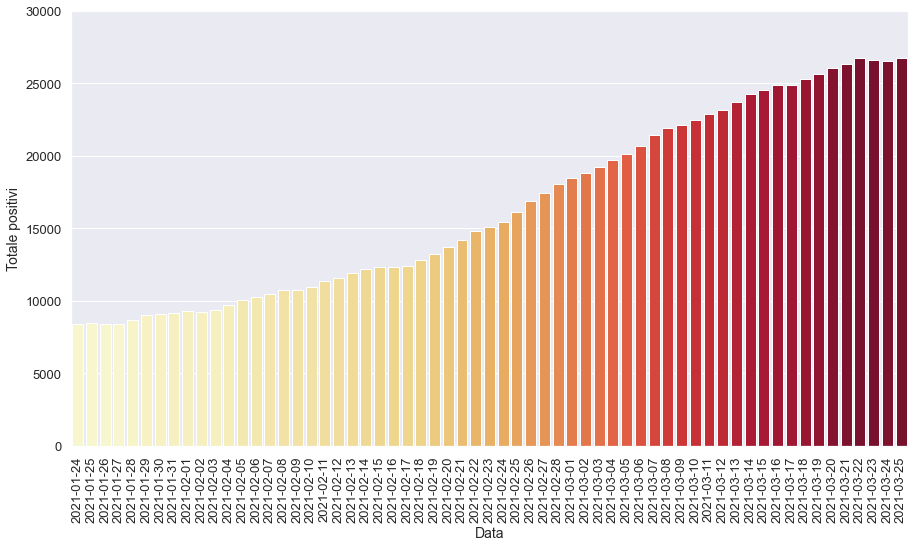

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

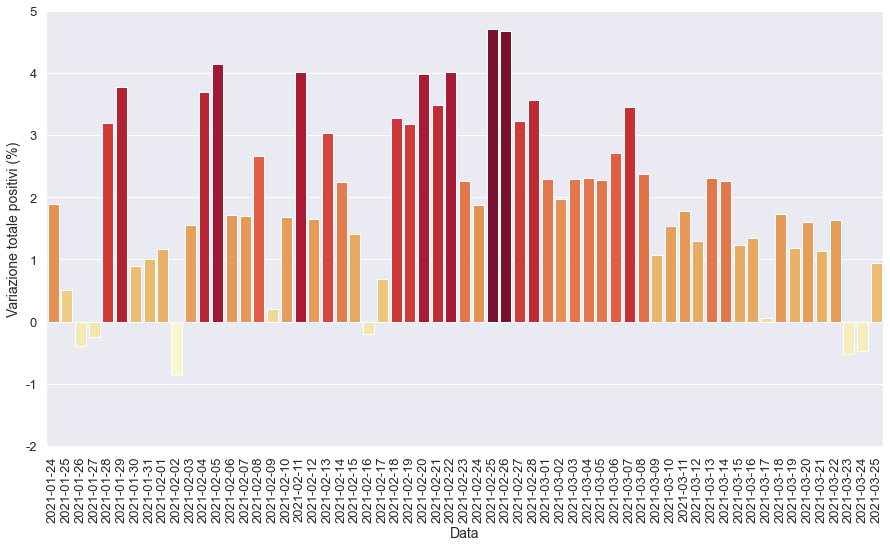

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

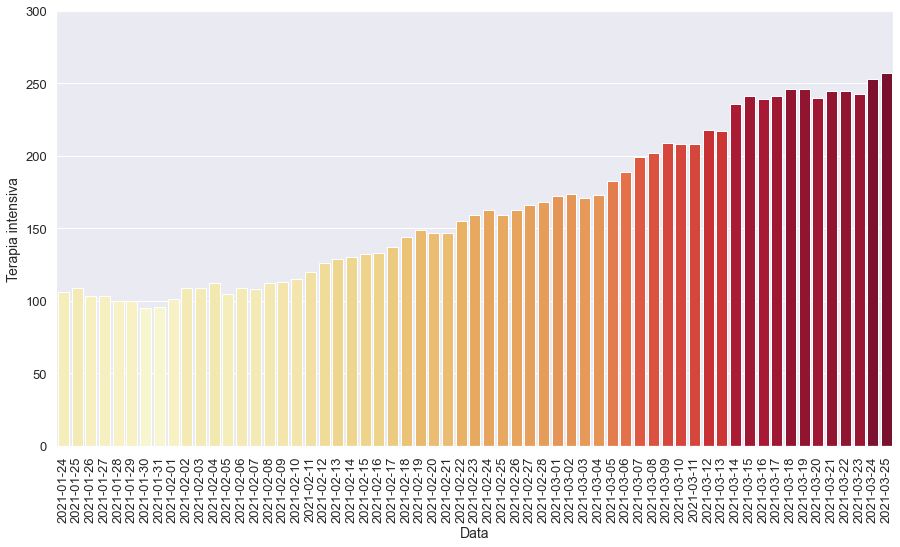

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

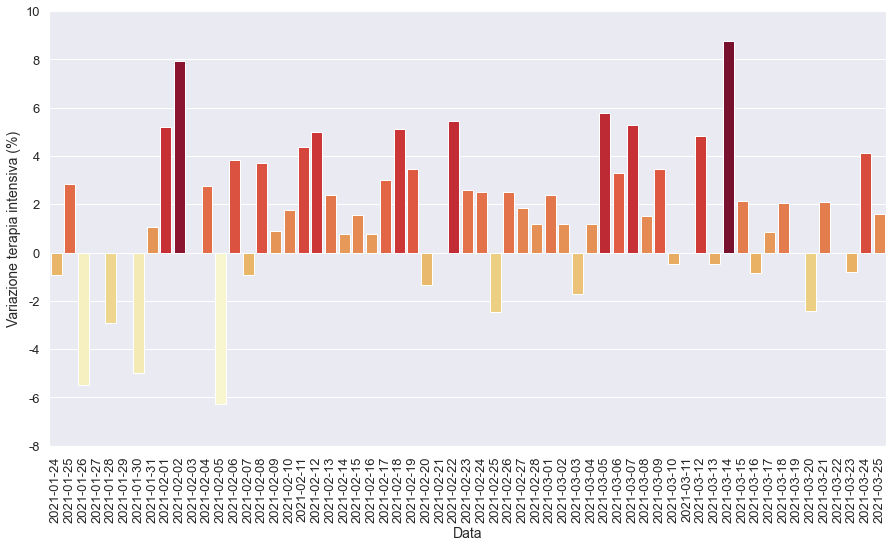

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

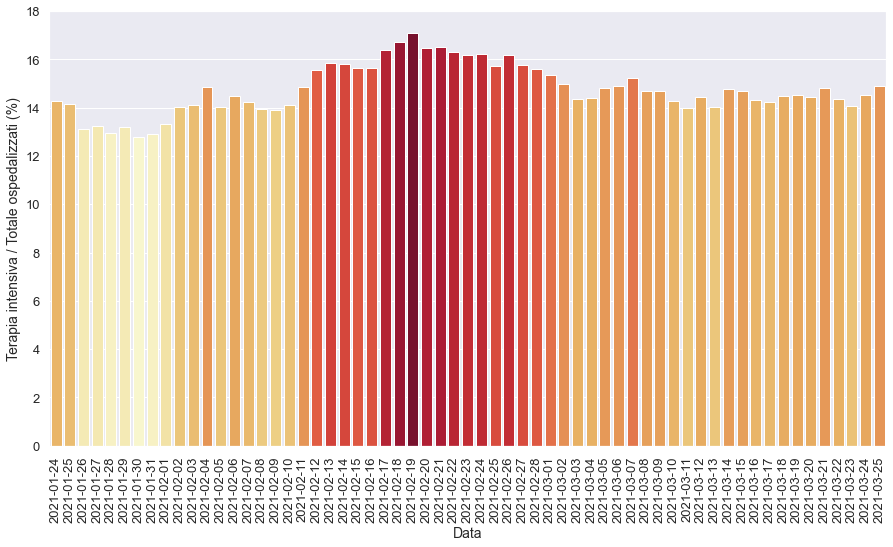

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

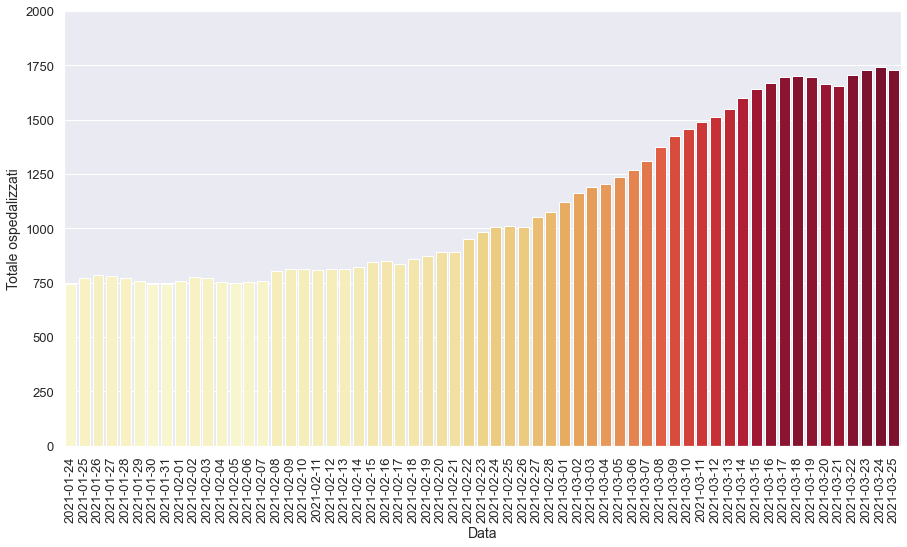

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

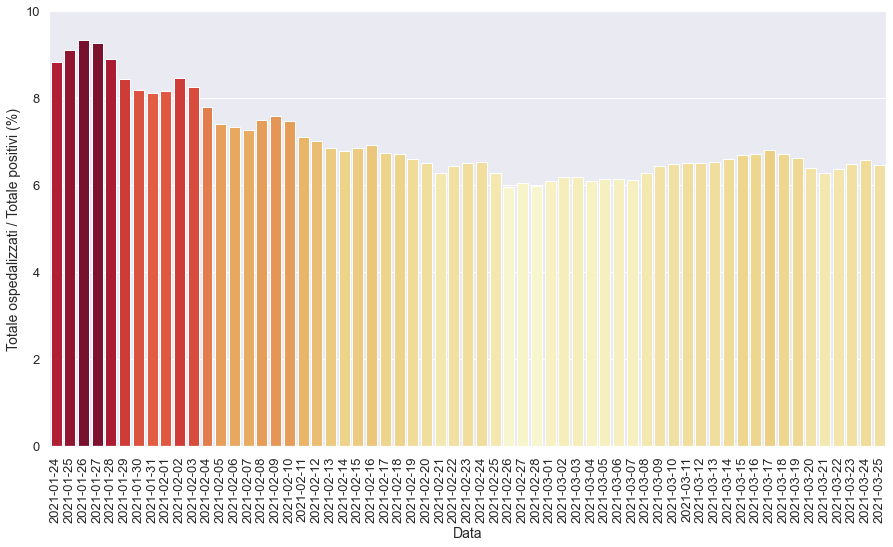

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

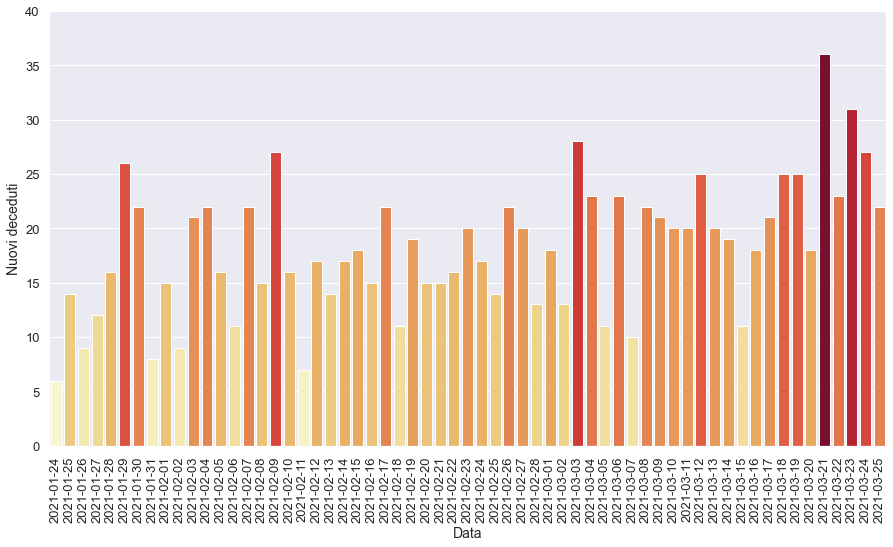

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

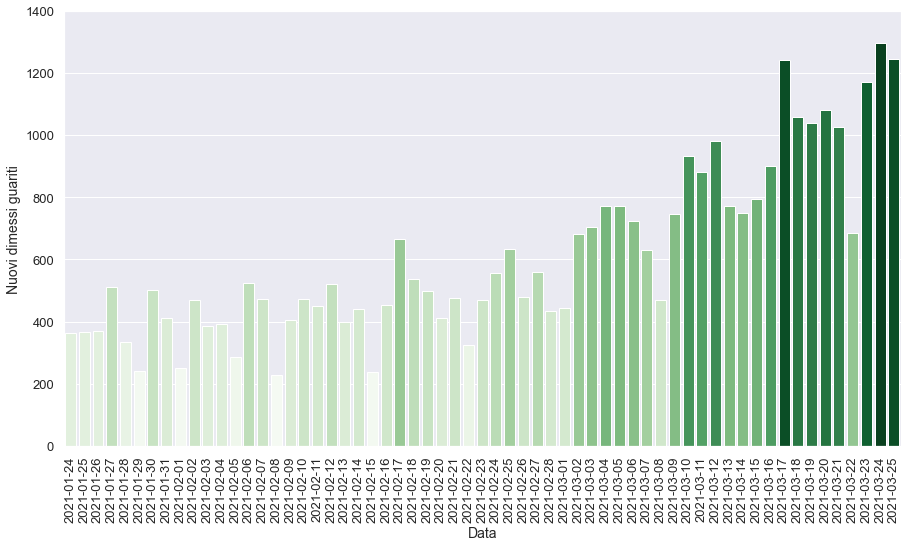

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-23T17:00:00,9,Toscana,824,159,983,14138,15121,334,824,...,20.0,19725.0,9033.0,303.0,16.17,6.50,4.18,9.12,2.58,2.26
1,2021-02-24T17:00:00,9,Toscana,842,163,1005,14400,15405,284,857,...,17.0,21198.0,9995.0,262.0,16.22,6.52,4.04,8.57,2.52,1.88
2,2021-02-25T17:00:00,9,Toscana,853,159,1012,15118,16130,725,1374,...,14.0,22735.0,12584.0,718.0,15.71,6.27,6.04,10.92,-2.45,4.71
3,2021-02-26T17:00:00,9,Toscana,844,163,1007,15876,16883,753,1254,...,22.0,23028.0,11800.0,758.0,16.19,5.96,5.45,10.63,2.52,4.67
4,2021-02-27T17:00:00,9,Toscana,887,166,1053,16376,17429,546,1126,...,20.0,23360.0,12412.0,500.0,15.76,6.04,4.82,9.07,1.84,3.23
5,2021-02-28T17:00:00,9,Toscana,909,168,1077,16972,18049,620,1068,...,13.0,19116.0,11149.0,596.0,15.60,5.97,5.59,9.58,1.20,3.56
6,2021-03-01T17:00:00,9,Toscana,950,172,1122,17343,18465,416,877,...,18.0,12273.0,7198.0,371.0,15.33,6.08,7.15,12.18,2.38,2.30
7,2021-03-02T17:00:00,9,Toscana,989,174,1163,17665,18828,363,1058,...,13.0,23324.0,11566.0,322.0,14.96,6.18,4.54,9.15,1.16,1.97
8,2021-03-03T17:00:00,9,Toscana,1021,171,1192,18067,19259,431,1163,...,28.0,24913.0,13257.0,402.0,14.35,6.19,4.67,8.77,-1.72,2.29
9,2021-03-04T17:00:00,9,Toscana,1029,173,1202,18501,19703,444,1239,...,23.0,23744.0,13025.0,434.0,14.39,6.10,5.22,9.51,1.17,2.31


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

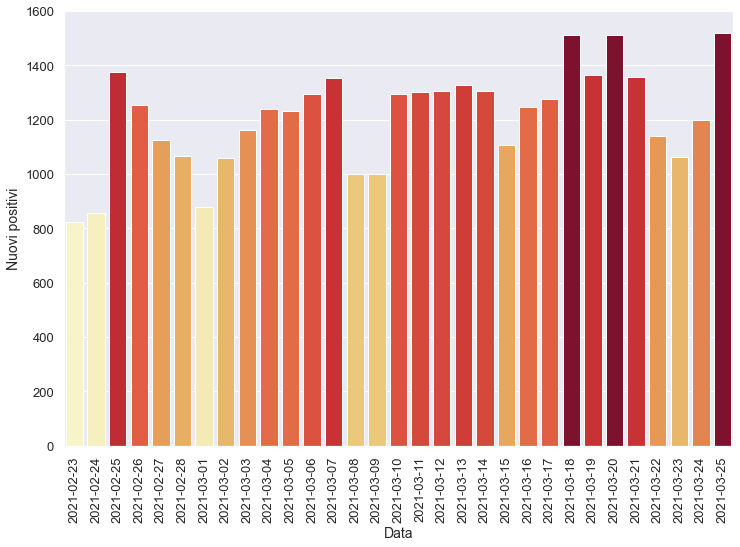

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

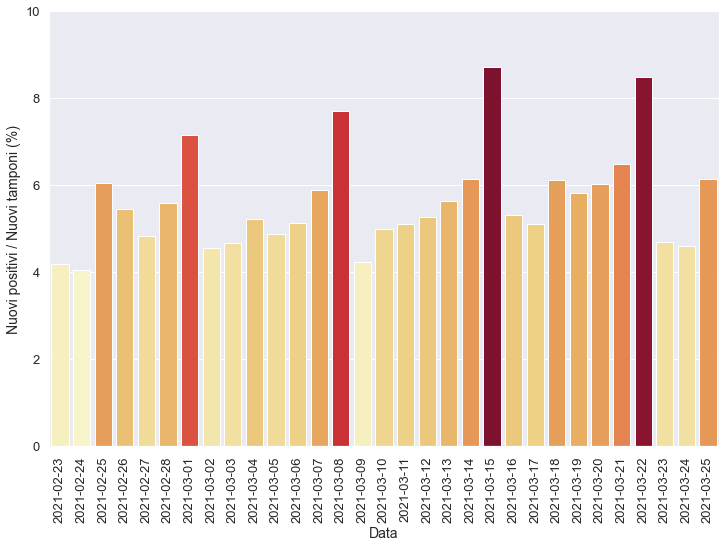

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

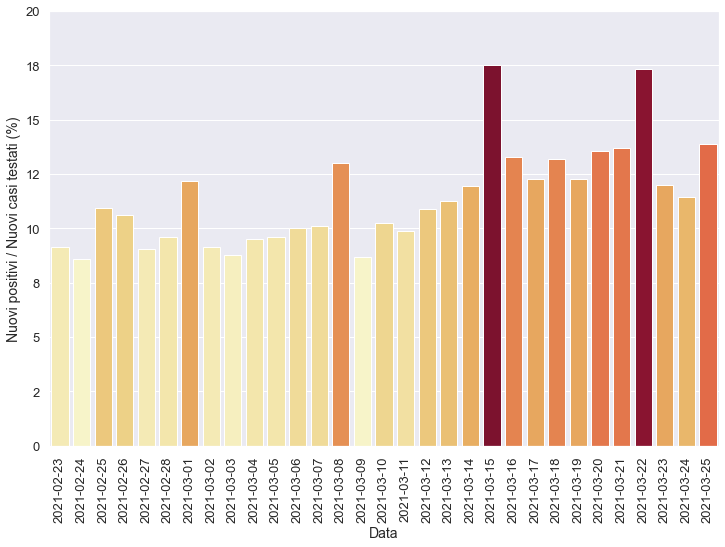

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

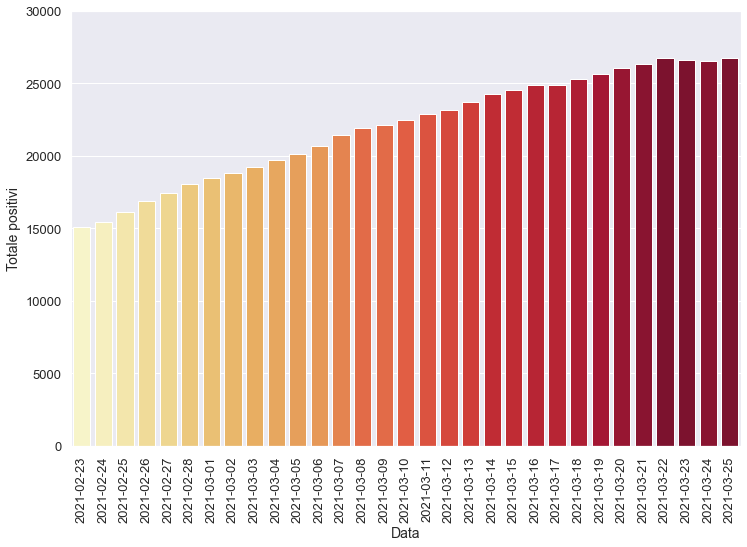

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

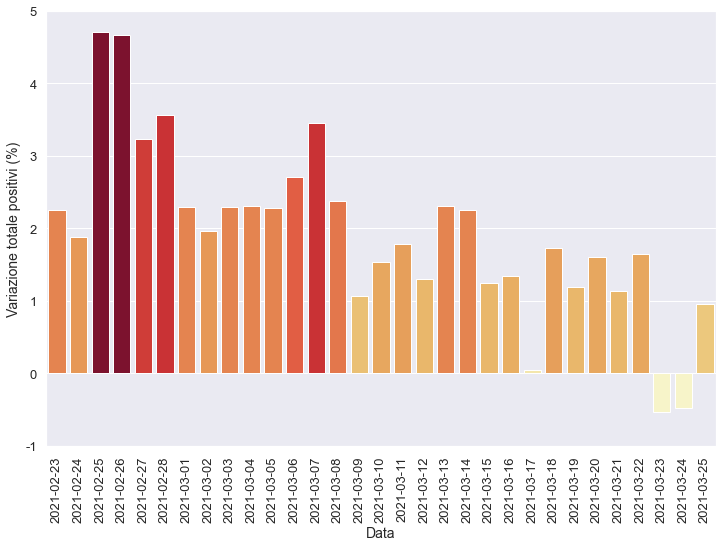

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

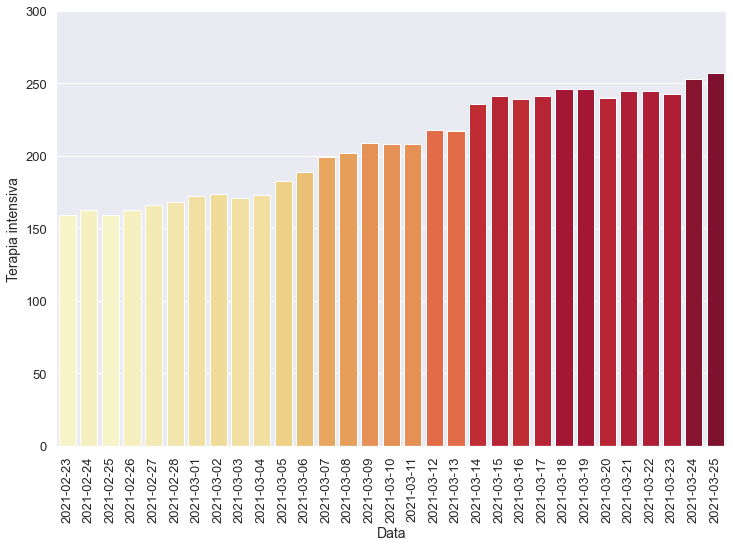

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

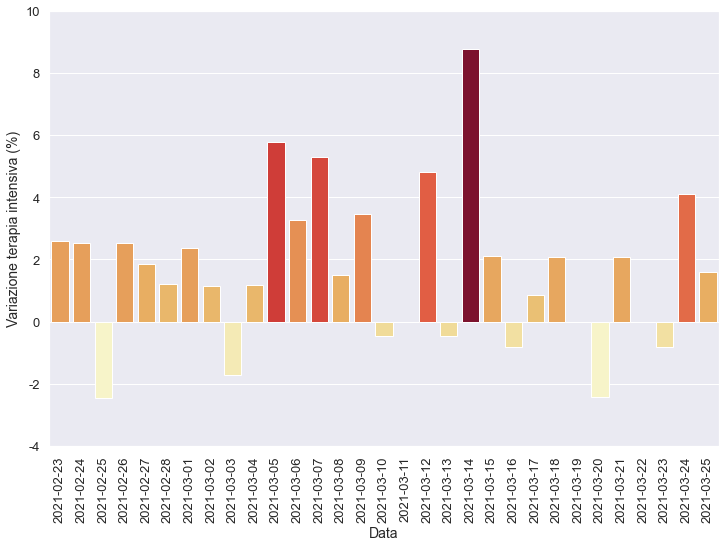

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

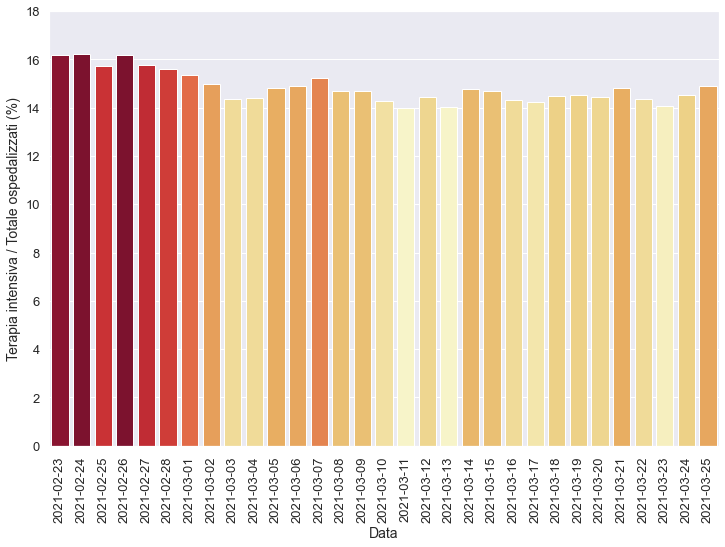

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

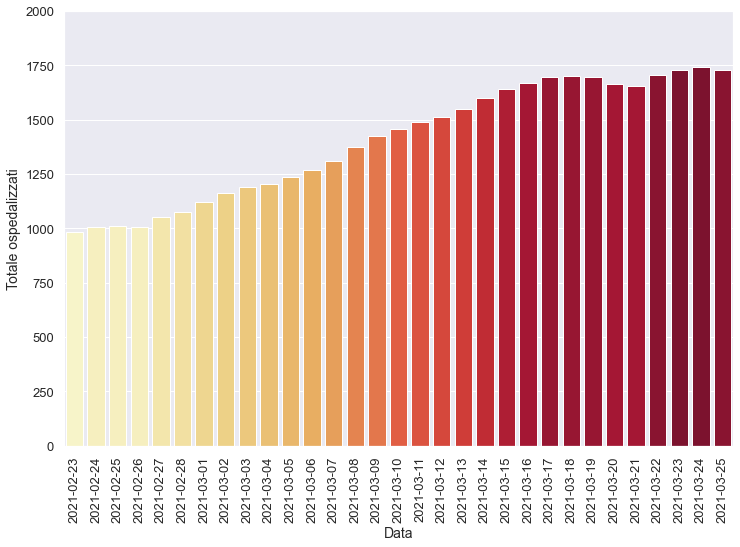

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

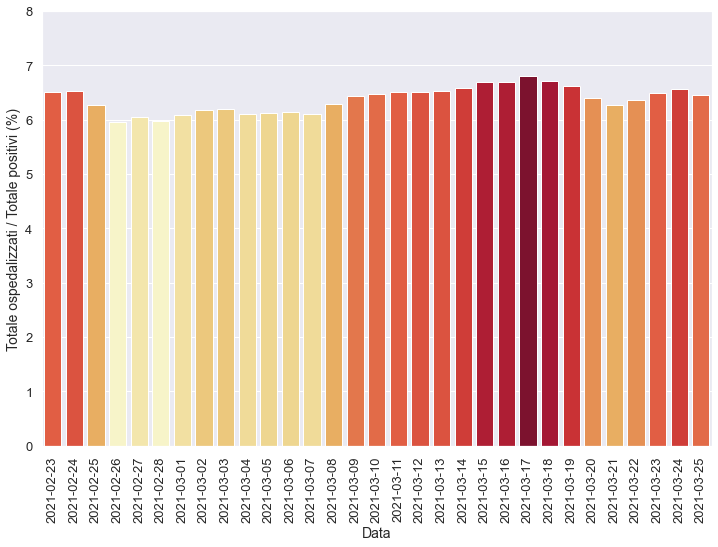

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

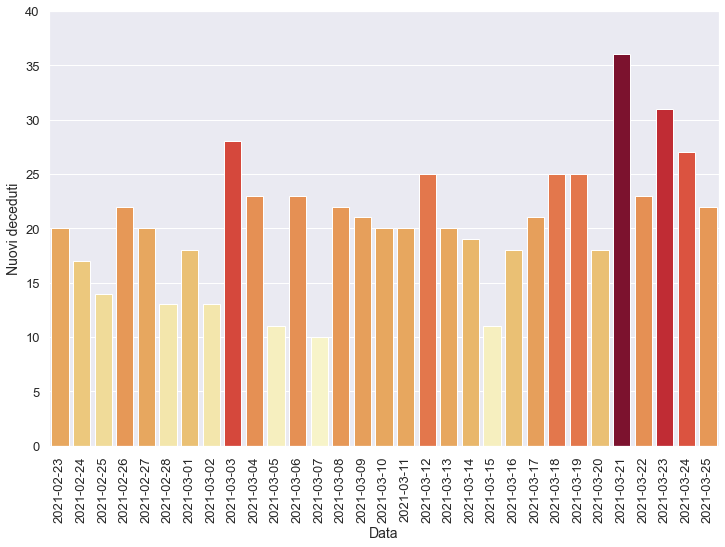

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

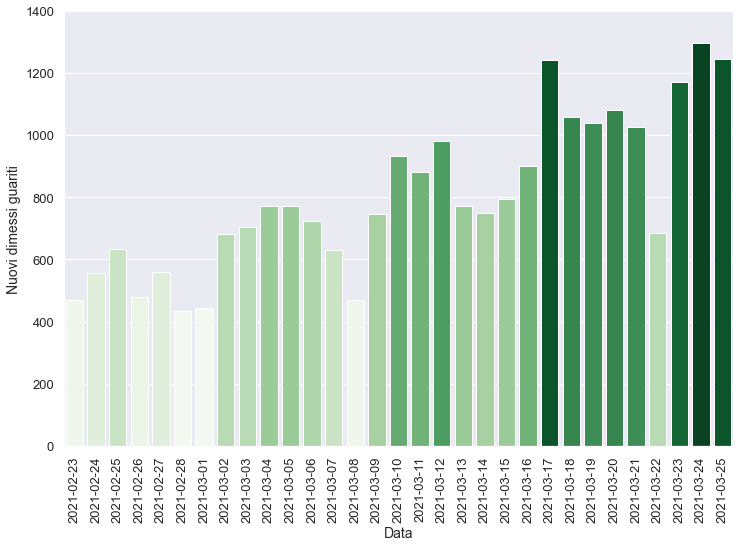

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-18T17:00:00,9,Toscana,1454,246,1700,23638,25338,431,1513,...,25.0,24764.0,11462.0,425.0,14.47,6.71,6.11,13.20,2.07,1.73
1,2021-03-19T17:00:00,9,Toscana,1448,246,1694,23945,25639,301,1365,...,25.0,23465.0,11115.0,307.0,14.52,6.61,5.82,12.28,0.00,1.19
2,2021-03-20T17:00:00,9,Toscana,1424,240,1664,24387,26051,412,1510,...,18.0,25044.0,11117.0,442.0,14.42,6.39,6.03,13.58,-2.44,1.61
3,2021-03-21T17:00:00,9,Toscana,1408,245,1653,24695,26348,297,1358,...,36.0,20929.0,9929.0,308.0,14.82,6.27,6.49,13.68,2.08,1.14
4,2021-03-22T17:00:00,9,Toscana,1461,245,1706,25073,26779,431,1140,...,23.0,13459.0,6582.0,378.0,14.36,6.37,8.47,17.32,0.00,1.64
5,2021-03-23T17:00:00,9,Toscana,1486,243,1729,24909,26638,-141,1062,...,31.0,22677.0,8839.0,-164.0,14.05,6.49,4.68,12.01,-0.82,-0.53
6,2021-03-24T17:00:00,9,Toscana,1488,253,1741,24770,26511,-127,1197,...,27.0,26059.0,10451.0,-139.0,14.53,6.57,4.59,11.45,4.12,-0.48
7,2021-03-25T17:00:00,9,Toscana,1470,257,1727,25035,26762,251,1518,...,22.0,24739.0,10923.0,265.0,14.88,6.45,6.14,13.90,1.58,0.95


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

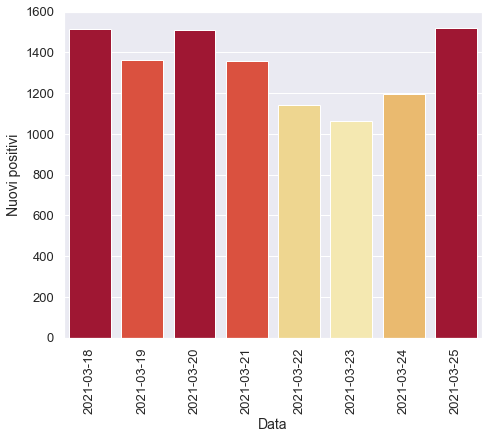

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

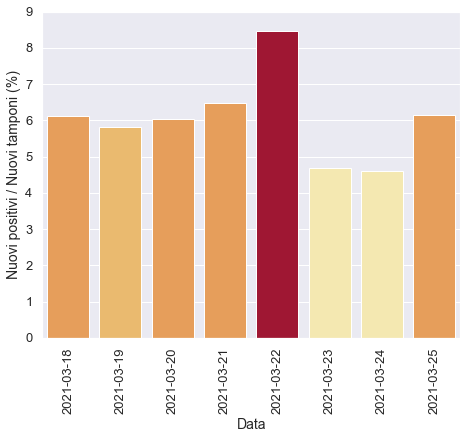

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

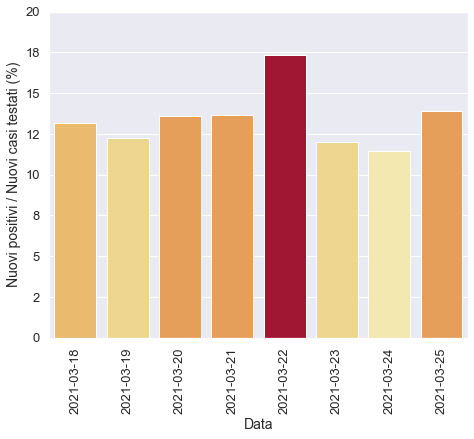

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

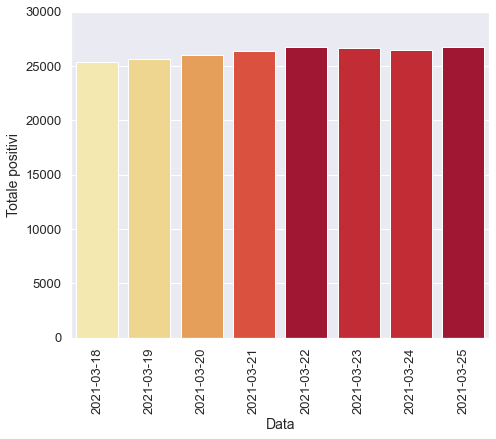

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

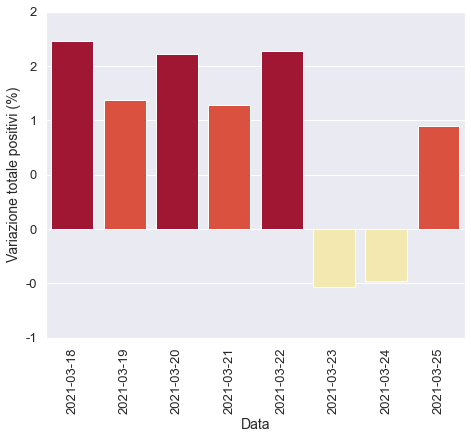

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

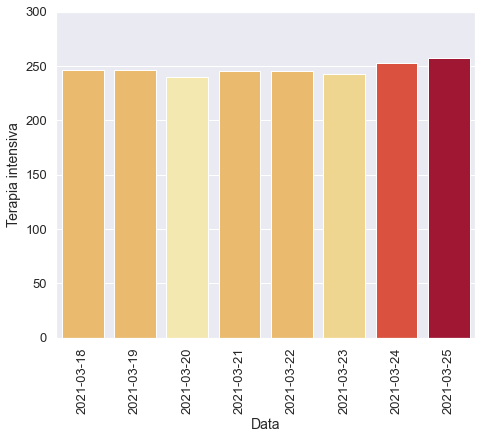

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

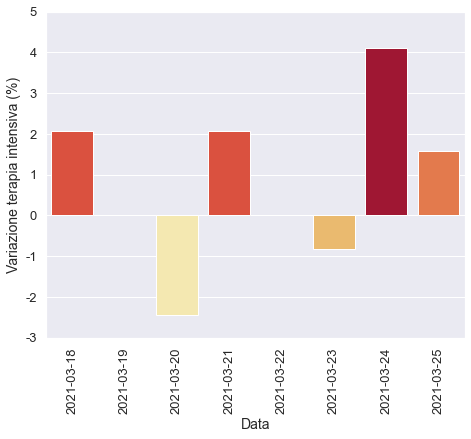

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

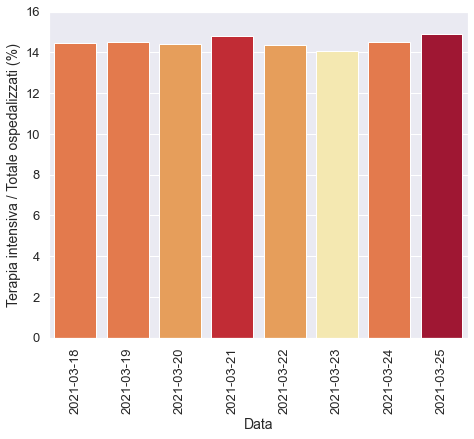

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

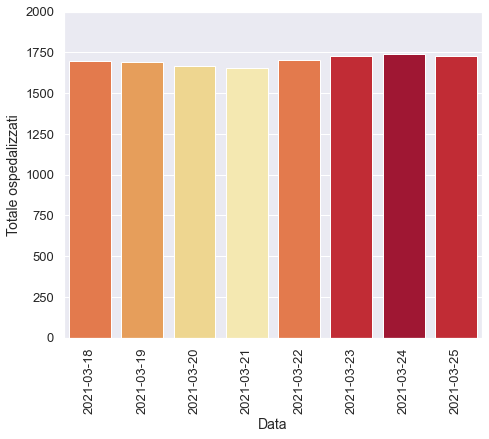

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

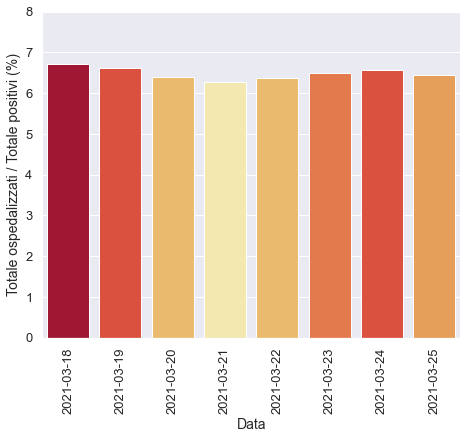

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

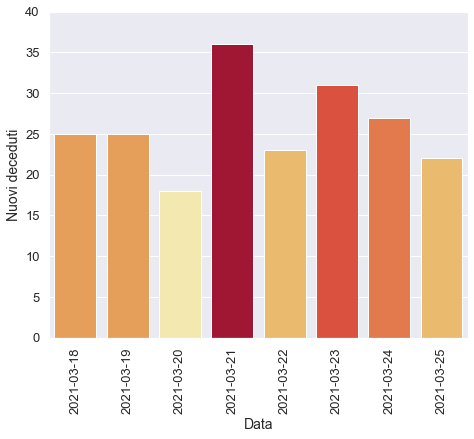

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

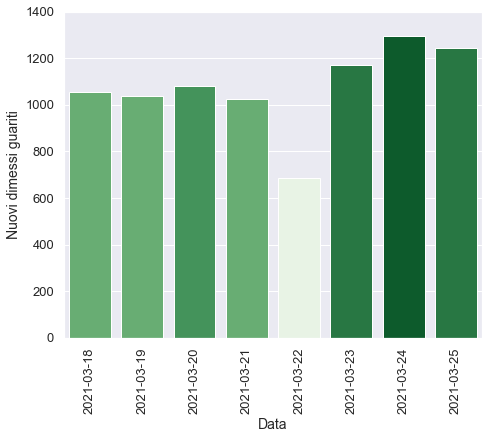

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)